In [85]:
import numpy as np
import matplotlib.pyplot as plt

num_segments = 500
alphas = list(np.logspace(-2, 0.3, 4))
gamma = 0.99
temps = list(np.logspace(-10, 2, 4))
num_trials = 10

#round alphas and temps to 3 after the first non-zero digit (eg 0.0000000012345 -> 0.00000000123) whereas round(0000000012345, 3) = 0

def round_to_n(x, n):
    return round(x, -int(np.floor(np.log10(x))) + (n - 1))

alphas = [round_to_n(alpha, 3) for alpha in alphas]
temps = [round_to_n(temp, 3) for temp in temps]


In [90]:
# load results
sarsa_test_rewards = np.load("sarsa_test_rewards.npy")
sarsa_train_rewards = np.load("sarsa_train_rewards.npy")
expected_sarsa_test_rewards = np.load("expected_sarsa_test_rewards.npy")
expected_sarsa_train_rewards = np.load("expected_sarsa_train_rewards.npy")
hybrid_sarsa_q_test_rewards = np.load("hybrid_sarsa_q_test_rewards.npy")
hybrid_sarsa_q_train_rewards = np.load("hybrid_sarsa_q_train_rewards.npy")

# caluculate rewards over the last 10 segments for all trials
sarsa_avg_test_rewards = np.array([sarsa_test_rewards[:, i, j, -10:].mean() for i in range(len(alphas)) for j in range(len(temps))]).reshape(len(temps),len(alphas))
sarsa_min_test_rewards = np.array([sarsa_test_rewards[:, i, j, -10:].min() for i in range(len(alphas)) for j in range(len(temps))]).reshape(len(temps),len(alphas))
sarsa_max_test_rewards = np.array([sarsa_test_rewards[:, i, j, -10:].max() for i in range(len(alphas)) for j in range(len(temps))]).reshape(len(temps),len(alphas))

sarsa_avg_train_rewards = np.array([sarsa_train_rewards[:, i, j, -10:].mean() for i in range(len(alphas)) for j in range(len(temps))]).reshape(len(temps),len(alphas))
sarsa_min_train_rewards = np.array([sarsa_train_rewards[:, i, j, -10:].min() for i in range(len(alphas)) for j in range(len(temps))]).reshape(len(temps),len(alphas))
sarsa_max_train_rewards = np.array([sarsa_train_rewards[:, i, j, -10:].max() for i in range(len(alphas)) for j in range(len(temps))]).reshape(len(temps),len(alphas))

expected_sarsa_avg_test_rewards = np.array([expected_sarsa_test_rewards[:, i, j, -10:].mean() for i in range(len(alphas)) for j in range(len(temps))]).reshape(len(temps),len(alphas))
expected_sarsa_min_test_rewards = np.array([expected_sarsa_test_rewards[:, i, j, -10:].min() for i in range(len(alphas)) for j in range(len(temps))]).reshape(len(temps),len(alphas))
expected_sarsa_max_test_rewards = np.array([expected_sarsa_test_rewards[:, i, j, -10:].max() for i in range(len(alphas)) for j in range(len(temps))]).reshape(len(temps),len(alphas))

expected_sarsa_avg_train_rewards = np.array([expected_sarsa_train_rewards[:, i, j, -10:].mean() for i in range(len(alphas)) for j in range(len(temps))]).reshape(len(temps),len(alphas))
expected_sarsa_min_train_rewards = np.array([expected_sarsa_train_rewards[:, i, j, -10:].min() for i in range(len(alphas)) for j in range(len(temps))]).reshape(len(temps),len(alphas))
expected_sarsa_max_train_rewards = np.array([expected_sarsa_train_rewards[:, i, j, -10:].max() for i in range(len(alphas)) for j in range(len(temps))]).reshape(len(temps),len(alphas))

hybrid_sarsa_q_avg_test_rewards = np.array([hybrid_sarsa_q_test_rewards[:, i, j, -10:].mean() for i in range(len(alphas)) for j in range(len(temps))]).reshape(len(temps),len(alphas))
hybrid_sarsa_q_min_test_rewards = np.array([hybrid_sarsa_q_test_rewards[:, i, j, -10:].min() for i in range(len(alphas)) for j in range(len(temps))]).reshape(len(temps),len(alphas))
hybrid_sarsa_q_max_test_rewards = np.array([hybrid_sarsa_q_test_rewards[:, i, j, -10:].max() for i in range(len(alphas)) for j in range(len(temps))]).reshape(len(temps),len(alphas))


hybrid_sarsa_q_avg_train_rewards = np.array([hybrid_sarsa_q_train_rewards[:, i, j, -10:].mean() for i in range(len(alphas)) for j in range(len(temps))]).reshape(len(temps),len(alphas))
hybrid_sarsa_q_min_train_rewards = np.array([hybrid_sarsa_q_train_rewards[:, i, j, -10:].min() for i in range(len(alphas)) for j in range(len(temps))]).reshape(len(temps),len(alphas))
hybrid_sarsa_q_max_train_rewards = np.array([hybrid_sarsa_q_train_rewards[:, i, j, -10:].max() for i in range(len(alphas)) for j in range(len(temps))]).reshape(len(temps),len(alphas))



[[-298.69 -265.8  -255.37 -195.8 ]
 [   5.39    7.68    6.23 -103.65]
 [   8.14    7.88    7.65 -429.83]
 [-451.46 -415.82 -254.   -757.37]] [[-1991. -2000. -2000.  -200.]
 [ -200.     3.  -200.  -200.]
 [    3.     3.     3. -2000.]
 [-2000. -2000. -2000. -2000.]] [[  14.   15.   15.   11.]
 [  15.   15.   15.   14.]
 [  15.   14.   15.   13.]
 [-200. -200. -200. -200.]]


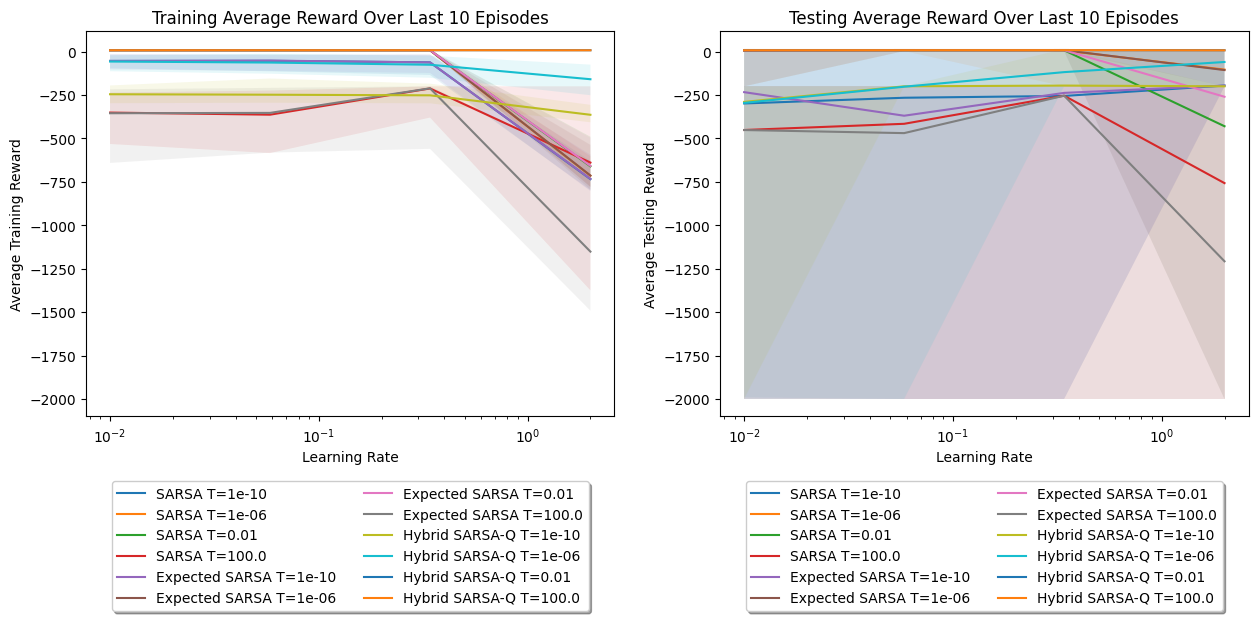

In [87]:
plt.figure(figsize=(15, 5))
ax1 = plt.subplot(1, 2, 1)
# plot average training rewards
for i in range(len(temps)):
    plt.plot(alphas, sarsa_avg_train_rewards[i], label=f"SARSA T={temps[i]}")
    # add uncertainty regions by taking min and max of the last 10 segments
    plt.fill_between(alphas, sarsa_min_train_rewards[i], sarsa_max_train_rewards[i], alpha=0.1)
    
for i in range(len(temps)):
    plt.plot(alphas, expected_sarsa_avg_train_rewards[i], label=f"Expected SARSA T={temps[i]}")
    # add uncertainty regions
    plt.fill_between(alphas, expected_sarsa_min_train_rewards[i], expected_sarsa_max_train_rewards[i], alpha=0.1)
for i in range(len(temps)):
    plt.plot(alphas, hybrid_sarsa_q_avg_train_rewards[i], label=f"Hybrid SARSA-Q T={temps[i]}")
    # add uncertainty regions
    plt.fill_between(alphas, hybrid_sarsa_q_min_train_rewards[i], hybrid_sarsa_q_max_train_rewards[i], alpha=0.1)
plt.xlabel("Learning Rate")
plt.xticks(alphas)
plt.ylabel("Average Training Reward")
plt.title("Training Average Reward Over Last 10 Episodes")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)

plt.subplot(1, 2, 2, sharey=ax1, sharex=ax1)
# plot average test rewards
for i in range(len(temps)):
    plt.plot(alphas, sarsa_avg_test_rewards[i], label=f"SARSA T={temps[i]}")
    # add uncertainty regions
    plt.fill_between(alphas, sarsa_min_test_rewards[i], sarsa_max_test_rewards[i], alpha=0.1)
for i in range(len(temps)):
    plt.plot(alphas, expected_sarsa_avg_test_rewards[i], label=f"Expected SARSA T={temps[i]}")
    # add uncertainty regions
    plt.fill_between(alphas, expected_sarsa_min_test_rewards[i], expected_sarsa_max_test_rewards[i], alpha=0.1)
for i in range(len(temps)):
    plt.plot(alphas, hybrid_sarsa_q_avg_test_rewards[i], label=f"Hybrid SARSA-Q T={temps[i]}")
    # add uncertainty regions
    plt.fill_between(alphas, hybrid_sarsa_q_min_test_rewards[i], hybrid_sarsa_q_max_test_rewards[i], alpha=0.1)
plt.xlabel("Learning Rate")
plt.xticks(alphas)
plt.xscale('log')
plt.ylabel("Average Testing Reward")
plt.title("Testing Average Reward Over Last 10 Episodes")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)
plt.show()

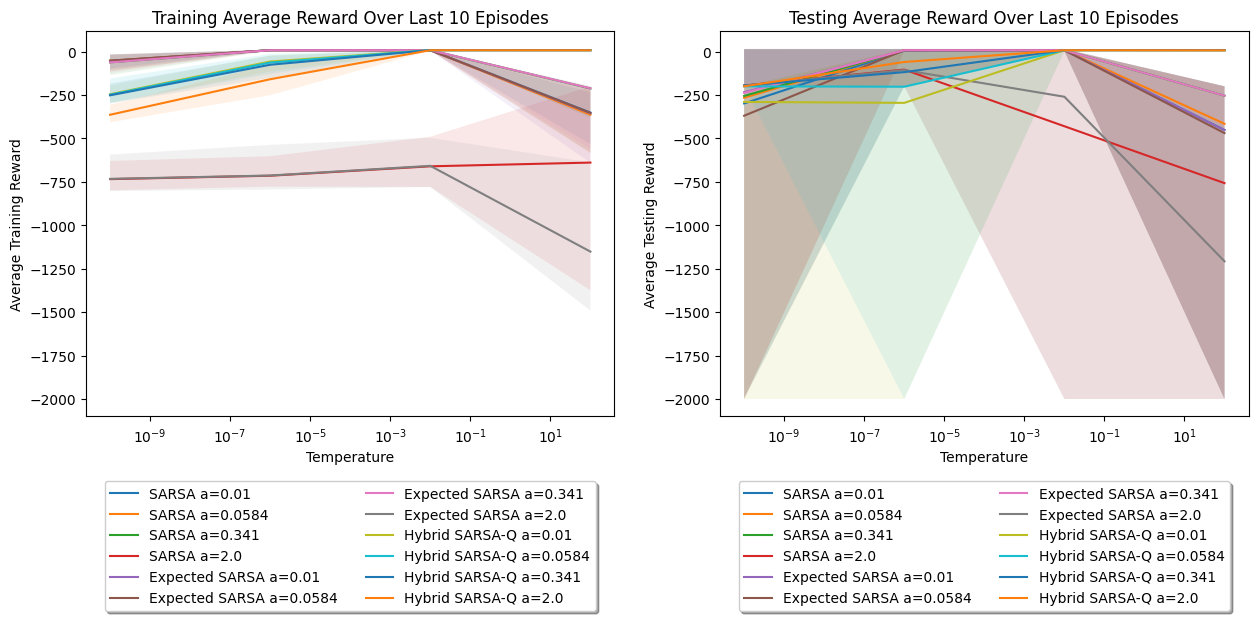

In [88]:
plt.figure(figsize=(15, 5))
ax1 = plt.subplot(1, 2, 1)
# plot average training rewards
for i in range(len(alphas)):
    plt.plot(temps, sarsa_avg_train_rewards.T[i], label=f"SARSA a={alphas[i]}")
    # add uncertainty regions by taking min and max of the last 10 segments
    plt.fill_between(temps, sarsa_min_train_rewards.T[i], sarsa_max_train_rewards.T[i], alpha=0.1)

for i in range(len(alphas)):
    plt.plot(temps, expected_sarsa_avg_train_rewards.T[i], label=f"Expected SARSA a={alphas[i]}")
    # add uncertainty regions
    plt.fill_between(temps, expected_sarsa_min_train_rewards.T[i], expected_sarsa_max_train_rewards.T[i], alpha=0.1)

for i in range(len(alphas)):
    plt.plot(temps, hybrid_sarsa_q_avg_train_rewards.T[i], label=f"Hybrid SARSA-Q a={alphas[i]}")
    # add uncertainty regions
    plt.fill_between(temps, hybrid_sarsa_q_min_train_rewards.T[i], hybrid_sarsa_q_max_train_rewards.T[i], alpha=0.1)

plt.xlabel("Temperature")
plt.xticks(temps)
plt.ylabel("Average Training Reward")
plt.title("Training Average Reward Over Last 10 Episodes")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)

plt.subplot(1, 2, 2, sharey=ax1, sharex=ax1)
# plot average test rewards
for i in range(len(alphas)):
    plt.plot(temps, sarsa_avg_test_rewards.T[i], label=f"SARSA a={alphas[i]}")
    # add uncertainty regions
    plt.fill_between(temps, sarsa_min_test_rewards.T[i], sarsa_max_test_rewards.T[i], alpha=0.1)

for i in range(len(alphas)):
    plt.plot(temps, expected_sarsa_avg_test_rewards.T[i], label=f"Expected SARSA a={alphas[i]}")
    # add uncertainty regions
    plt.fill_between(temps, expected_sarsa_min_test_rewards.T[i], expected_sarsa_max_test_rewards.T[i], alpha=0.1)

for i in range(len(alphas)):
    plt.plot(temps, hybrid_sarsa_q_avg_test_rewards.T[i], label=f"Hybrid SARSA-Q a={alphas[i]}")
    # add uncertainty regions
    plt.fill_between(temps, hybrid_sarsa_q_min_test_rewards.T[i], hybrid_sarsa_q_max_test_rewards.T[i], alpha=0.1)

plt.xlabel("Temperature")
plt.xticks(temps)
plt.xscale('log')
plt.ylabel("Average Testing Reward")
plt.title("Testing Average Reward Over Last 10 Episodes")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)
plt.show()

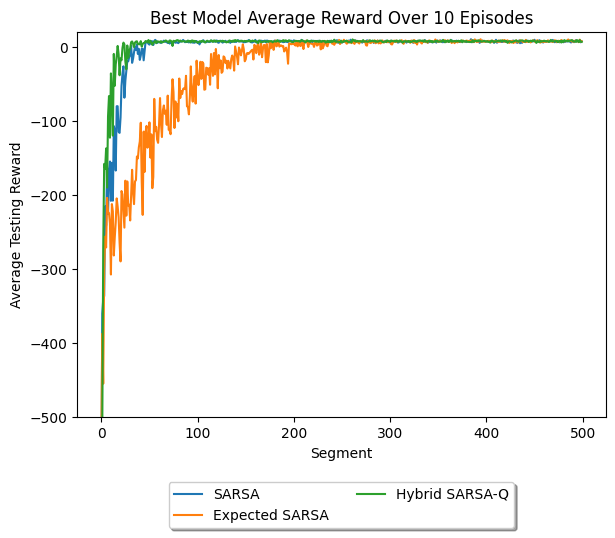

In [89]:
# Learning curves (mean and standard deviation computed based on the 10 runs) for the best
# parameter setting for each algorithm. X-axis shows the segment, Y-axis shows return over-
# time.
sarsa_idx = np.argmax(sarsa_avg_test_rewards.flatten())
sarsa_best_alpha = alphas[sarsa_idx // len(temps)]
sarsa_best_temp = temps[sarsa_idx % len(temps)]

expected_sarsa_idx = np.argmax(expected_sarsa_avg_test_rewards.flatten())
expected_sarsa_best_alpha = alphas[expected_sarsa_idx // len(temps)]
expected_sarsa_best_temp = temps[expected_sarsa_idx % len(temps)]

hybrid_sarsa_q_idx = np.argmax(hybrid_sarsa_q_avg_test_rewards.flatten())
hybrid_sarsa_q_best_alpha = alphas[hybrid_sarsa_q_idx // len(temps)]
hybrid_sarsa_q_best_temp = temps[hybrid_sarsa_q_idx % len(temps)]

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 2, sharey=ax1, sharex=ax1)
# plot average test rewards with curves and fill between the standard deviation
plt.plot(sarsa_train_rewards[0, alphas.index(sarsa_best_alpha), temps.index(sarsa_best_temp)], label="SARSA")
# plt.fill_between(range(num_segments), sarsa_test_rewards[:, alphas.index(sarsa_best_alpha), temps.index(sarsa_best_temp)].mean(axis=0) - sarsa_test_rewards[:, alphas.index(sarsa_best_alpha), temps.index(sarsa_best_temp)].std(axis=0), sarsa_test_rewards[:, alphas.index(sarsa_best_alpha), temps.index(sarsa_best_temp)].mean(axis=0) + sarsa_test_rewards[:, alphas.index(sarsa_best_alpha), temps.index(sarsa_best_temp)].std(axis=0), alpha=0.2)
plt.plot(expected_sarsa_train_rewards[0, alphas.index(expected_sarsa_best_alpha), temps.index(expected_sarsa_best_temp)], label="Expected SARSA")
# plt.fill_between(range(num_segments), expected_sarsa_test_rewards[:, alphas.index(expected_sarsa_best_alpha), temps.index(expected_sarsa_best_temp)].mean(axis=0) - expected_sarsa_test_rewards[:, alphas.index(expected_sarsa_best_alpha), temps.index(expected_sarsa_best_temp)].std(axis=0), expected_sarsa_test_rewards[:, alphas.index(expected_sarsa_best_alpha), temps.index(expected_sarsa_best_temp)].mean(axis=0) + expected_sarsa_test_rewards[:, alphas.index(expected_sarsa_best_alpha), temps.index(expected_sarsa_best_temp)].std(axis=0), alpha=0.2)
plt.plot(hybrid_sarsa_q_train_rewards[0, alphas.index(hybrid_sarsa_q_best_alpha), temps.index(hybrid_sarsa_q_best_temp)], label="Hybrid SARSA-Q")
# plt.fill_between(range(num_segments), hybrid_sarsa_q_test_rewards[:, alphas.index(hybrid_sarsa_q_best_alpha), temps.index(hybrid_sarsa_q_best_temp)].mean(axis=0) - hybrid_sarsa_q_test_rewards[:, alphas.index(hybrid_sarsa_q_best_alpha), temps.index(hybrid_sarsa_q_best_temp)].std(axis=0), hybrid_sarsa_q_test_rewards[:, alphas.index(hybrid_sarsa_q_best_alpha), temps.index(hybrid_sarsa_q_best_temp)].mean(axis=0) + hybrid_sarsa_q_test_rewards[:, alphas.index(hybrid_sarsa_q_best_alpha), temps.index(hybrid_sarsa_q_best_temp)].std(axis=0), alpha=0.2)
plt.xlabel("Segment")
plt.xscale('linear')
plt.ylabel("Average Testing Reward")
plt.ylim([-500,20])
plt.title("Best Model Average Reward Over 10 Episodes")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)
plt.show()

For our choise of parameters, we decided to use a gamma of 0.99 as there are many negative rewards and few positive rewards that are far in the future. Also we first tested the edges of our parameters such as temperature and learning rate such that on either end we would see decreased performance. Then we did a log space search between those two extremes to show what comes to be upside down u curves for the rewards. Some of the tests never complete which caps out at usually a -2000 reward hence why some of the error bars are so large. Taking the best parameters for each shows that the hybrid sarsa-q was the fastest to converge followed closely by the sarsa and then later the expected sarsa. Expected sarsa does make sense it would take longer to converge becuase it is more of a moving average of the rewards. The sarsa and hybrid sarsa-q are more reactive to the rewards and thus converge faster however the hybrid sarsa-q also is more complex giving some trade offs. 